# Analisando Dados da Produção Hospitalar

In [65]:
# Para usar as bibliotecas pandas e matplotlib é necessário fazer a instalação usando pip install no terminal
# pip install pandas
# pip install matplotlib

In [66]:
# Para usar o pandas, basta importar a biblioteca para seu projeto
import pandas as pd

In [67]:
# Carregamento dos dados do arquivo CSV "sih_cnv_qiuf094147179_101_158_151 (ano-mes-processamento).csv" para o DataFrame 'dados'.
# O arquivo é lido considerando a codificação ISO-8859-1 para suportar caracteres especiais europeus.
# As três primeiras linhas e as últimas 12 linhas são ignoradas para excluir cabeçalhos longos e rodapés, respectivamente, que não são parte dos dados analíticos.
# O delimitador de campos no arquivo é definido como ponto e vírgula (;), e o motor de leitura 'python' é utilizado para permitir a opção 'skipfooter'.
dados = pd.read_csv("sih_cnv_qiuf094221179_101_158_151 (ano-mes-atendimento).csv", 
                    encoding="ISO-8859-1", 
                    skiprows=3, 
                    skipfooter=12, 
                    sep=";", 
                    engine='python',
                    thousands=".",
                    decimal=",")

# Configura o pandas para exibir números de ponto flutuante com duas casas decimais e separadores de milhar
pd.options.display.float_format = '{:,.2f}'.format

In [68]:
# primeiras 5 linhas do DataFrame
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,"12,505,974.83","12,009,682.89","11,892,438.13","12,737,928.88","12,068,445.93","10,814,659.45","7,839,878.93","4,969,181.30",2434117.87,"1,394,262,146.50"
1,12 Acre,-,-,-,-,-,-,-,-,-,...,"4,861,672.52","5,282,731.30","4,830,246.24","4,925,043.24","4,329,288.81","4,071,963.23","3,233,614.21","1,394,717.40",-,"587,778,407.94"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,"22,951,007.22","22,636,889.89","22,193,955.78","21,762,872.97","16,686,364.04","17,051,515.93","14,725,982.12","11,345,788.28",4838198.31,"2,613,559,191.21"
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,"4,915,988.80","4,097,022.28","3,814,616.24","3,180,791.10","2,362,582.36","1,585,002.57","165,184.76","91,360.44",41945.05,"451,170,144.15"
4,15 Pará,-,-,-,-,-,-,-,-,-,...,"52,730,367.64","49,576,192.93","49,819,035.62","52,500,501.45","51,714,821.84","51,237,171.71","49,646,581.93","32,989,201.74",13610385.98,"6,322,687,933.44"


In [69]:
# últimas 5 linhas do DataFrame
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,...,"119,911,799.35","114,180,633.26","114,821,469.38","120,841,672.92","114,019,622.04","116,187,553.64","101,723,680.10","79,016,335.07",35097902.08,"16,750,147,966.65"
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,...,"27,012,124.81","25,980,327.81","27,408,836.70","27,761,038.69","25,897,790.89","24,356,440.44","17,975,196.66","11,104,710.76",3622254.04,"3,219,624,366.70"
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,...,"24,470,787.76","22,929,285.47","23,550,934.50","24,243,689.65","22,424,730.11","21,572,148.20","18,757,993.99","13,608,235.28",7711923.78,"2,988,456,549.66"
25,52 Goiás,-,-,-,-,-,-,-,-,-,...,"50,134,061.74","47,935,572.72","49,412,906.09","49,763,873.98","48,040,227.82","47,989,959.81","45,180,102.56","35,603,860.42",18035437.49,"6,682,626,416.14"
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,...,"29,919,839.16","28,337,591.67","29,544,407.37","30,864,169.80","29,636,228.70","29,776,844.99","27,785,666.95","22,830,282.42",15359150.30,"3,543,027,009.96"


In [224]:
dados[["Unidade da Federação","2008/Jan","2009/Jan","2020/Jan","2021/Jan","Total"]].sort_values(by="Total", ascending=False)

,Unidade da Federação,2008/Jan,2009/Jan,2020/Jan,2021/Jan,Total
19,35 São Paulo,"1.098.866.284,75","192.853.575,37","307.669.677,79","364.372.576,29","54.440.115.497,18"
16,31 Minas Gerais,"206.936.986,60","99.018.155,84","158.317.086,31","194.994.209,07","27.581.694.491,94"
20,41 Paraná,"58.081.334,45","60.381.593,99","122.331.688,11","130.565.644,70","19.763.419.297,81"
22,43 Rio Grande do Sul,"51.064.610,03","61.522.380,02","97.661.861,43","115.706.214,46","16.750.147.966,65"
18,33 Rio de Janeiro,"253.437.962,44","60.886.702,38","81.472.624,71","105.069.175,43","14.318.869.113,09"
15,29 Bahia,"76.783.410,11","43.856.594,59","74.414.835,96","88.218.581,81","13.106.353.081,84"
12,26 Pernambuco,"51.279.301,86","58.860.678,33","69.640.191,25","83.167.702,10","11.552.242.820,69"
21,42 Santa Catarina,"53.034.384,67","32.082.203,52","64.776.814,58","75.671.947,73","10.780.033.131,67"
9,23 Ceará,"32.444.328,54","32.123.065,16","53.141.655,93","57.477.041,80","8.854.791.965,38"
25,52 Goiás,"80.007.952,86","20.817.880,66","36.909.170,75","44.670.509,27","6.682.626.416,14"


In [70]:
# Ao executar o comando info() foi identificado que existem diversas colunas do tipo object. Na verdade, deveria existir apenas uma.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 321 entries, Unidade da Federação to Total
dtypes: float64(198), object(123)
memory usage: 67.8+ KB


In [71]:
# Verifica os tipos de dados de cada coluna do DataFrame => float, numeric, object (string) entre outros
# Nesse caso, diversas colunas que deveriam ser float foram apresentadas como object
dados.dtypes

Unidade da Federação     object
1992/Mar                 object
1992/Abr                 object
1993/Mai                 object
1993/Dez                 object
                         ...   
2023/Out                float64
2023/Nov                float64
2023/Dez                float64
2024/Jan                 object
Total                   float64
Length: 321, dtype: object

In [72]:
# Aqui usamos o método 'select_dtypes' para listar colunas do tipo 'object'
# Descobrimos diversas colunas do tipo 'object'
colunas_object = dados.select_dtypes(include=['object']).columns

print("Colunas do tipo 'object':")
print(colunas_object)

Colunas do tipo 'object':
Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2006/Nov', '2006/Dez', '2007/Jan', '2007/Fev', '2007/Mar', '2007/Abr',
       '2007/Mai', '2007/Jun', '2007/Jul', '2024/Jan'],
      dtype='object', length=123)


In [73]:
# Executando o filtro apenas nas colunas do tipo object, verificamos que é apresentado o caractere '-' em parte deles
dados[colunas_object[1:]]

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,...,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2024/Jan
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,604.33,-,-,-,-,-,2434117.87
1,-,-,-,-,-,-,-,-,-,-,...,-,-,184.65,-,-,-,-,1099.17,-,-
2,-,-,-,-,-,-,-,-,-,-,...,-,-,1134.83,951.89,-,531.94,-,-,212.75,4838198.31
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,413.69,-,41945.05
4,-,-,-,-,-,-,-,-,-,-,...,-,-,4994.86,2182.97,-,-,210.20,399.57,9487.90,13610385.98
5,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,1647.39,7754.72,12695.61,1802014.83
6,-,-,-,-,-,-,-,-,-,-,...,-,1122.46,-,578.69,-,-,-,34446.08,586.69,303117.03
7,-,-,-,-,-,-,-,-,-,-,...,-,-,2767.08,2871.13,-,295.36,7090.58,-,42360.79,10982397.14
8,-,-,-,-,-,-,-,-,-,-,...,-,-,-,162.01,-,-,428.77,-,12172.72,8855530.23
9,-,-,-,-,-,-,-,-,-,-,...,-,-,149.65,3186.33,-,-,-,-,3698.69,21259868.14


In [74]:
# Convertendo as colunas para numérico, transformando valores não convertíveis em NaN (Not a Number)
# fiz um slice na lista colunas_object para iniciar da coluna de índice 1 [1:]
for coluna in colunas_object[1:]:
    dados[coluna] = pd.to_numeric(dados[coluna], errors='coerce')


In [75]:
# Após a conversão, Verificamos que existe apenas uma coluna do tipo object
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 321 entries, Unidade da Federação to Total
dtypes: float64(320), object(1)
memory usage: 67.8+ KB


In [76]:
# Verificando se as colunas foram convertidas em float
dados[colunas_object].dtypes

Unidade da Federação     object
1992/Mar                float64
1992/Abr                float64
1993/Mai                float64
1993/Dez                float64
                         ...   
2007/Abr                float64
2007/Mai                float64
2007/Jun                float64
2007/Jul                float64
2024/Jan                float64
Length: 123, dtype: object

In [77]:
# Exibindo as colunas convertidas em NaN (not a number)
dados[colunas_object].head(10)

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2024/Jan
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,604.33,NaN,NaN,NaN,NaN,NaN,"2,434,117.87"
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,184.65,NaN,NaN,NaN,NaN,"1,099.17",NaN,NaN
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,134.83",951.89,NaN,531.94,NaN,NaN,212.75,"4,838,198.31"
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413.69,NaN,"41,945.05"
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"4,994.86","2,182.97",NaN,NaN,210.20,399.57,"9,487.90","13,610,385.98"
5,16 Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"1,647.39","7,754.72","12,695.61","1,802,014.83"
6,17 Tocantins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"1,122.46",NaN,578.69,NaN,NaN,NaN,"34,446.08",586.69,"303,117.03"
7,21 Maranhão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"2,767.08","2,871.13",NaN,295.36,"7,090.58",NaN,"42,360.79","10,982,397.14"
8,22 Piauí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,162.01,NaN,NaN,428.77,NaN,"12,172.72","8,855,530.23"
9,23 Ceará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,149.65,"3,186.33",NaN,NaN,NaN,NaN,"3,698.69","21,259,868.14"


In [78]:
# Calcula a média apenas das colunas numéricas, ignorando as colunas não numéricas
# Usei a propridade 'numeric_only=True' para não gerar erro por conta da primeira coluna Unidade da Federação ainda ser do tipo object
dados.mean(numeric_only=True)

1992/Mar          40,243.16
1992/Abr          11,449.99
1993/Mai          34,583.77
1993/Dez          68,556.52
1994/Jan          39,809.34
                 ...       
2023/Out      64,657,967.71
2023/Nov      57,001,423.07
2023/Dez      45,043,722.01
2024/Jan      26,069,055.25
Total      8,578,335,035.65
Length: 320, dtype: float64

In [79]:
# Configura a exibição de números flutuantes no Pandas para duas casas decimais.
# Usamos o código abaixo para evitar a exibição em notação científica (4540549e+08) na exibição de saída do comando .mean()

# Configura a exibição global de números de ponto flutuante no pandas para usar vírgula como separador decimal e ponto como separador de milhar. Isso é feito formatando os números com duas casas decimais, substituindo temporariamente as vírgulas por um marcador (@), trocando os pontos por vírgulas (para usar como separador decimal) e, finalmente, substituindo o marcador (@) por pontos (para usar como separador de milhar).
pd.options.display.float_format = lambda x: "{:,.2f}".format(x).replace(",", "@").replace(".", ",").replace("@", ".")


In [80]:
dados

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"12.505.974,83","12.009.682,89","11.892.438,13","12.737.928,88","12.068.445,93","10.814.659,45","7.839.878,93","4.969.181,30","2.434.117,87","1.394.262.146,50"
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4.861.672,52","5.282.731,30","4.830.246,24","4.925.043,24","4.329.288,81","4.071.963,23","3.233.614,21","1.394.717,40",NaN,"587.778.407,94"
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"22.951.007,22","22.636.889,89","22.193.955,78","21.762.872,97","16.686.364,04","17.051.515,93","14.725.982,12","11.345.788,28","4.838.198,31","2.613.559.191,21"
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4.915.988,80","4.097.022,28","3.814.616,24","3.180.791,10","2.362.582,36","1.585.002,57","165.184,76","91.360,44","41.945,05","451.170.144,15"
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"52.730.367,64","49.576.192,93","49.819.035,62","52.500.501,45","51.714.821,84","51.237.171,71","49.646.581,93","32.989.201,74","13.610.385,98","6.322.687.933,44"
5,16 Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"5.779.164,49","5.609.481,81","3.355.650,95","3.557.873,66","3.331.263,48","3.543.500,85","3.052.663,75","2.768.546,16","1.802.014,83","434.057.663,03"
6,17 Tocantins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"9.839.564,73","9.612.631,73","9.812.714,43","9.912.202,05","9.629.774,49","6.722.881,55","5.032.974,30","2.582.404,81","303.117,03","1.364.198.743,40"
7,21 Maranhão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"42.107.180,54","41.608.384,22","41.589.508,81","41.901.513,18","40.399.651,12","39.865.036,47","33.146.563,03","23.303.880,58","10.982.397,14","5.245.996.055,35"
8,22 Piauí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"24.290.899,80","22.652.737,92","24.148.200,85","24.142.847,31","23.745.716,86","22.878.158,31","19.415.247,34","15.246.017,28","8.855.530,23","3.055.504.906,18"
9,23 Ceará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"68.367.984,61","62.197.447,26","63.288.492,32","67.637.597,39","63.072.515,00","64.716.508,58","54.152.759,50","39.043.483,57","21.259.868,14","8.854.791.965,38"


In [81]:
dados.mean(numeric_only=True)

1992/Mar          40.243,16
1992/Abr          11.449,99
1993/Mai          34.583,77
1993/Dez          68.556,52
1994/Jan          39.809,34
                 ...       
2023/Out      64.657.967,71
2023/Nov      57.001.423,07
2023/Dez      45.043.722,01
2024/Jan      26.069.055,25
Total      8.578.335.035,65
Length: 320, dtype: float64

# Visualização de Dados com MatPlotLib

<Axes: xlabel='Unidade da Federação'>

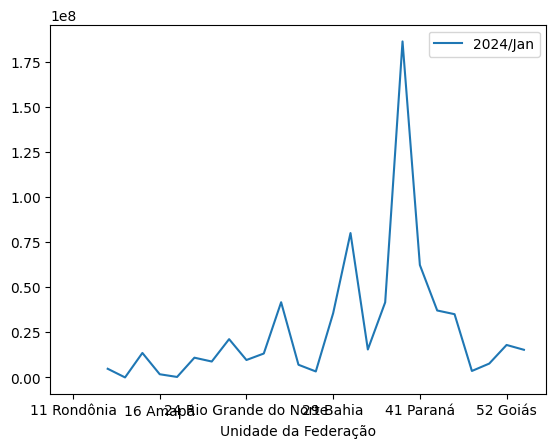

In [82]:
# exibe um gráfico de linhas (padrão) usando as colunas unidade da federação e 2024/Jan
dados.plot(x="Unidade da Federação", y="2024/Jan")

In [83]:
# Importa as bibliotecas necessárias para a criação e formatação de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

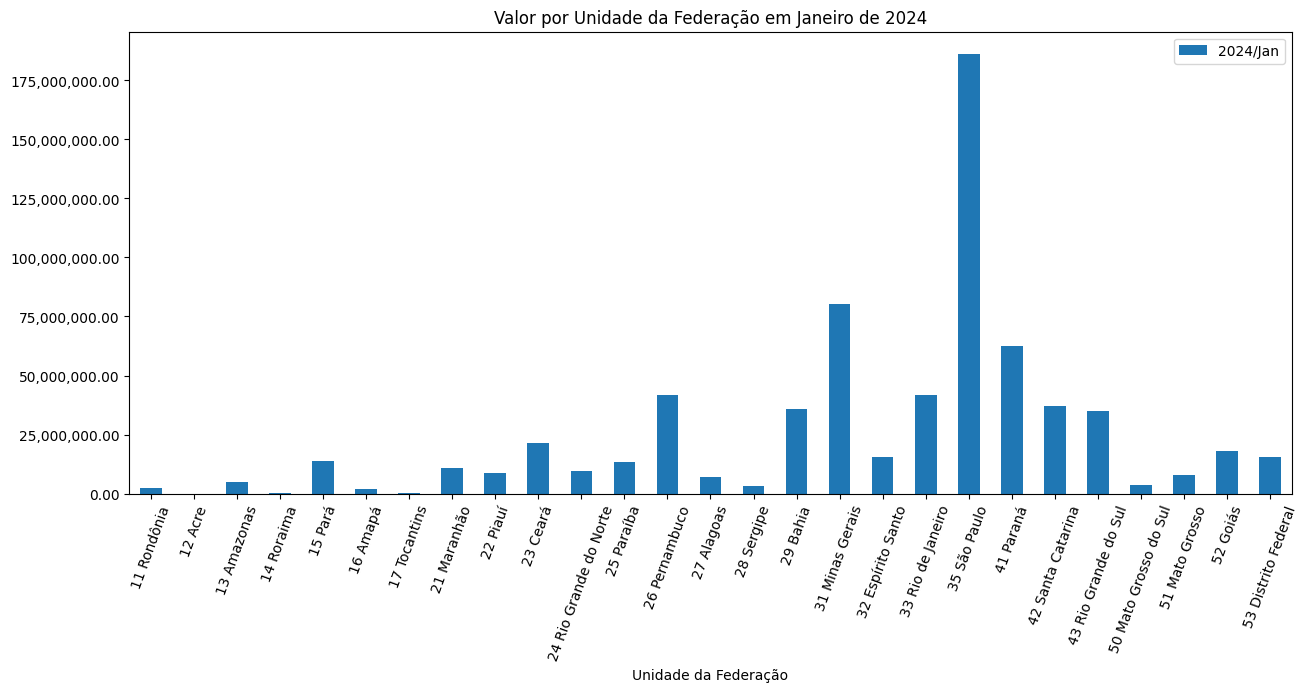

In [84]:
# Cria um gráfico de barras para visualizar os dados de '2024/Jan' por 'Unidade da Federação'.
# Configura o tamanho do gráfico através do parâmetro 'figsize'.
axis = dados.plot(x="Unidade da Federação", y="2024/Jan", kind="bar", figsize=(15,6))

# Configura o formato dos valores do eixo y para incluir separadores de milhar e decimais.
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Ajusta os rótulos do eixo x para ficarem em diagonal (45 graus, por exemplo)
#plt.xticks(rotation=70)

# Alternativamente, para uma abordagem mais customizada, você pode usar:
axis.set_xticklabels(axis.get_xticklabels(), rotation=70)

# Define o título do gráfico para melhor contextualização dos dados apresentados.
plt.title("Valor por Unidade da Federação em Janeiro de 2024")

# Exibe o gráfico configurado.
plt.show()

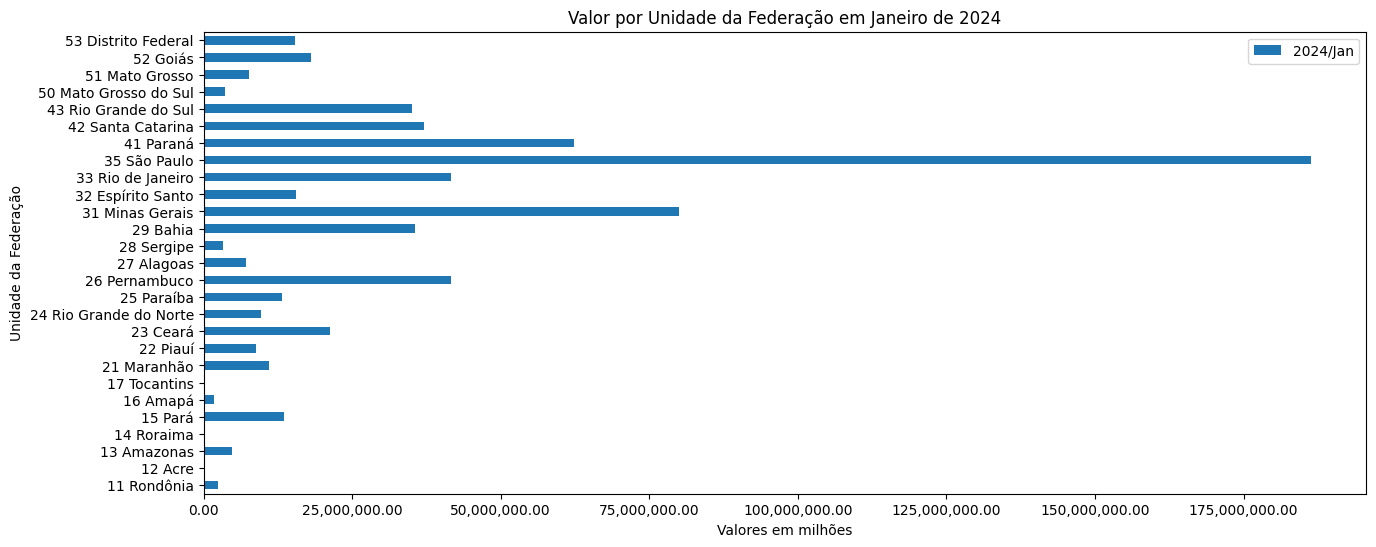

In [85]:
from matplotlib.ticker import FuncFormatter
# Sua função de formatação corrigida
def formatar_em_milhoes(x, pos):
    """Converte o valor 'x' em milhões e retorna como string."""
    return '%1.0f' % (x * 1e-6)

# Cria um gráfico de barras para visualizar os dados de '2024/Jan' por 'Unidade da Federação'.
# Configura o tamanho do gráfico através do parâmetro 'figsize'.
axis = dados.plot(x="Unidade da Federação", y="2024/Jan", kind="barh", figsize=(15,6))

# Configura o formato dos valores do eixo y para incluir separadores de milhar e decimais.
axis.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#axis.xaxis.set_major_formatter(ticker.FuncFormatter(formatar_em_milhoes))

# Define o título do gráfico para melhor contextualização dos dados apresentados.
plt.title("Valor por Unidade da Federação em Janeiro de 2024")

plt.xlabel("Valores em milhões")

# Exibe o gráfico configurado.
plt.show()

In [86]:
dados[["2008/Ago","2008/Set"]].head()

,2008/Ago,2008/Set
0,"2.938.286,29","2.843.930,91"
1,"1.886.871,84","2.084.884,80"
2,"8.331.763,97","8.148.089,92"
3,"1.045.291,11","1.003.740,89"
4,"23.259.148,28","23.667.690,01"


In [87]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"12.505.974,83","12.009.682,89","11.892.438,13","12.737.928,88","12.068.445,93","10.814.659,45","7.839.878,93","4.969.181,30","2.434.117,87","1.394.262.146,50"
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4.861.672,52","5.282.731,30","4.830.246,24","4.925.043,24","4.329.288,81","4.071.963,23","3.233.614,21","1.394.717,40",NaN,"587.778.407,94"
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"22.951.007,22","22.636.889,89","22.193.955,78","21.762.872,97","16.686.364,04","17.051.515,93","14.725.982,12","11.345.788,28","4.838.198,31","2.613.559.191,21"
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"4.915.988,80","4.097.022,28","3.814.616,24","3.180.791,10","2.362.582,36","1.585.002,57","165.184,76","91.360,44","41.945,05","451.170.144,15"
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"52.730.367,64","49.576.192,93","49.819.035,62","52.500.501,45","51.714.821,84","51.237.171,71","49.646.581,93","32.989.201,74","13.610.385,98","6.322.687.933,44"


In [88]:
# Exibe as colunas que possuem valores NaN
print(colunas_object)

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2006/Nov', '2006/Dez', '2007/Jan', '2007/Fev', '2007/Mar', '2007/Abr',
       '2007/Mai', '2007/Jun', '2007/Jul', '2024/Jan'],
      dtype='object', length=123)


In [89]:
# Exibe todas as colunas do dataframe
dados.columns

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2023/Mai', '2023/Jun', '2023/Jul', '2023/Ago', '2023/Set', '2023/Out',
       '2023/Nov', '2023/Dez', '2024/Jan', 'Total'],
      dtype='object', length=321)

In [90]:
# o método set() converte a lista de colunas em conjunto do Python permitindo operações de conjunto, como União. Interseção e Diferença
# Operação diferença para obter um conjunto de apenas com as colunas que possuem valores float em todas as linhas.
colunas_usaveis = set(dados.columns) - set(colunas_object)

# Exibe o tipo da variável
print(type(colunas_usaveis))

# Exibe as colunas que possuem todos os valores numéricos (float)
colunas_usaveis

<class 'set'>


{'2007/Ago',
 '2007/Dez',
 '2007/Nov',
 '2007/Out',
 '2007/Set',
 '2008/Abr',
 '2008/Ago',
 '2008/Dez',
 '2008/Fev',
 '2008/Jan',
 '2008/Jul',
 '2008/Jun',
 '2008/Mai',
 '2008/Mar',
 '2008/Nov',
 '2008/Out',
 '2008/Set',
 '2009/Abr',
 '2009/Ago',
 '2009/Dez',
 '2009/Fev',
 '2009/Jan',
 '2009/Jul',
 '2009/Jun',
 '2009/Mai',
 '2009/Mar',
 '2009/Nov',
 '2009/Out',
 '2009/Set',
 '2010/Abr',
 '2010/Ago',
 '2010/Dez',
 '2010/Fev',
 '2010/Jan',
 '2010/Jul',
 '2010/Jun',
 '2010/Mai',
 '2010/Mar',
 '2010/Nov',
 '2010/Out',
 '2010/Set',
 '2011/Abr',
 '2011/Ago',
 '2011/Dez',
 '2011/Fev',
 '2011/Jan',
 '2011/Jul',
 '2011/Jun',
 '2011/Mai',
 '2011/Mar',
 '2011/Nov',
 '2011/Out',
 '2011/Set',
 '2012/Abr',
 '2012/Ago',
 '2012/Dez',
 '2012/Fev',
 '2012/Jan',
 '2012/Jul',
 '2012/Jun',
 '2012/Mai',
 '2012/Mar',
 '2012/Nov',
 '2012/Out',
 '2012/Set',
 '2013/Abr',
 '2013/Ago',
 '2013/Dez',
 '2013/Fev',
 '2013/Jan',
 '2013/Jul',
 '2013/Jun',
 '2013/Mai',
 '2013/Mar',
 '2013/Nov',
 '2013/Out',
 '2013/Set',

In [91]:
# Converte o conjunto em uma lista
colunas_usaveis = list(colunas_usaveis)

# Exibe o tipo da variável
print(type(colunas_usaveis))

<class 'list'>


In [92]:
# Exibe as colunas que possuem todos os valores numéricos (float)
# Os valores estão fora de ordem, pois set (conjunto) são elementos não ordenados
colunas_usaveis

['2008/Jul',
 '2015/Jun',
 '2012/Out',
 '2008/Abr',
 '2008/Dez',
 '2018/Mai',
 '2016/Fev',
 '2011/Mar',
 '2016/Mar',
 '2008/Out',
 '2013/Jun',
 '2009/Out',
 '2014/Dez',
 '2021/Out',
 '2011/Fev',
 '2023/Abr',
 '2009/Jan',
 '2019/Out',
 '2018/Dez',
 '2023/Mar',
 '2010/Dez',
 '2014/Jul',
 '2022/Jul',
 '2014/Abr',
 '2022/Ago',
 '2008/Mai',
 '2019/Abr',
 '2014/Nov',
 '2021/Jun',
 '2013/Ago',
 '2022/Mar',
 '2018/Nov',
 '2019/Jan',
 '2013/Dez',
 '2010/Abr',
 '2016/Out',
 '2010/Mar',
 '2008/Nov',
 '2011/Mai',
 '2020/Mar',
 '2015/Mai',
 '2011/Ago',
 '2020/Jul',
 '2018/Out',
 '2021/Abr',
 '2022/Jan',
 '2022/Mai',
 '2008/Mar',
 '2010/Nov',
 '2018/Set',
 '2016/Nov',
 '2021/Mai',
 '2013/Abr',
 '2010/Jul',
 '2022/Abr',
 '2014/Set',
 '2017/Mar',
 '2019/Nov',
 '2015/Set',
 '2021/Set',
 '2016/Jul',
 '2017/Jan',
 '2009/Abr',
 '2018/Jul',
 '2017/Jun',
 '2012/Jul',
 '2021/Jul',
 '2008/Fev',
 '2019/Mai',
 '2019/Mar',
 '2012/Jan',
 '2023/Mai',
 '2014/Mai',
 '2012/Ago',
 '2021/Jan',
 '2014/Jan',
 '2007/Nov',

In [93]:
# Usando o método sort() para colocar as colunas em ordem cronológica
colunas_usaveis.sort()
colunas_usaveis


['2007/Ago',
 '2007/Dez',
 '2007/Nov',
 '2007/Out',
 '2007/Set',
 '2008/Abr',
 '2008/Ago',
 '2008/Dez',
 '2008/Fev',
 '2008/Jan',
 '2008/Jul',
 '2008/Jun',
 '2008/Mai',
 '2008/Mar',
 '2008/Nov',
 '2008/Out',
 '2008/Set',
 '2009/Abr',
 '2009/Ago',
 '2009/Dez',
 '2009/Fev',
 '2009/Jan',
 '2009/Jul',
 '2009/Jun',
 '2009/Mai',
 '2009/Mar',
 '2009/Nov',
 '2009/Out',
 '2009/Set',
 '2010/Abr',
 '2010/Ago',
 '2010/Dez',
 '2010/Fev',
 '2010/Jan',
 '2010/Jul',
 '2010/Jun',
 '2010/Mai',
 '2010/Mar',
 '2010/Nov',
 '2010/Out',
 '2010/Set',
 '2011/Abr',
 '2011/Ago',
 '2011/Dez',
 '2011/Fev',
 '2011/Jan',
 '2011/Jul',
 '2011/Jun',
 '2011/Mai',
 '2011/Mar',
 '2011/Nov',
 '2011/Out',
 '2011/Set',
 '2012/Abr',
 '2012/Ago',
 '2012/Dez',
 '2012/Fev',
 '2012/Jan',
 '2012/Jul',
 '2012/Jun',
 '2012/Mai',
 '2012/Mar',
 '2012/Nov',
 '2012/Out',
 '2012/Set',
 '2013/Abr',
 '2013/Ago',
 '2013/Dez',
 '2013/Fev',
 '2013/Jan',
 '2013/Jul',
 '2013/Jun',
 '2013/Mai',
 '2013/Mar',
 '2013/Nov',
 '2013/Out',
 '2013/Set',

In [95]:
# Agora, como colunas_usaveis é uma lista, podemos inserir elementos nela
colunas_usaveis.insert(0, "Unidade da Federação")

In [96]:
colunas_usaveis[:5]

['Unidade da Federação', '2007/Ago', '2007/Dez', '2007/Nov', '2007/Out']

In [97]:
dados_usuaveis = dados[colunas_usaveis]
dados_usuaveis.head()

,Unidade da Federação,2007/Ago,2007/Dez,2007/Nov,2007/Out,2007/Set,2008/Abr,2008/Ago,2008/Dez,2008/Fev,...,2023/Fev,2023/Jan,2023/Jul,2023/Jun,2023/Mai,2023/Mar,2023/Nov,2023/Out,2023/Set,Total
0,11 Rondônia,"4.209,37","711.758,31","346.912,84","133.645,19","16.397,03","2.143.353,81","2.938.286,29","2.651.804,89","1.940.792,63",...,"10.030.205,85","10.740.989,45","11.892.438,13","12.009.682,89","12.505.974,83","12.294.890,40","7.839.878,93","10.814.659,45","12.068.445,93","1.394.262.146,50"
1,12 Acre,"10.470,07","769.612,36","301.323,68","86.200,85","14.001,71","2.057.829,69","1.886.871,84","2.196.651,69","1.743.978,66",...,"3.681.605,49","4.031.665,20","4.830.246,24","5.282.731,30","4.861.672,52","4.660.970,89","3.233.614,21","4.071.963,23","4.329.288,81","587.778.407,94"
2,13 Amazonas,"35.752,72","5.949.408,99","2.020.381,79","416.012,30","45.570,64","8.531.576,49","8.331.763,97","7.764.782,66","7.934.652,10",...,"18.106.972,90","18.254.319,87","22.193.955,78","22.636.889,89","22.951.007,22","20.916.455,27","14.725.982,12","17.051.515,93","16.686.364,04","2.613.559.191,21"
3,14 Roraima,"4.785,91","470.676,43","369.328,51","43.852,67","11.858,63","896.952,53","1.045.291,11","1.236.529,18","771.687,83",...,"3.600.034,74","3.975.249,60","3.814.616,24","4.097.022,28","4.915.988,80","5.138.823,17","165.184,76","1.585.002,57","2.362.582,36","451.170.144,15"
4,15 Pará,"181.159,29","13.162.823,43","5.105.406,44","1.893.197,50","433.414,74","23.436.682,75","23.259.148,28","23.836.162,40","20.126.081,01",...,"43.531.526,93","48.239.104,57","49.819.035,62","49.576.192,93","52.730.367,64","50.953.053,21","49.646.581,93","51.237.171,71","51.714.821,84","6.322.687.933,44"


In [98]:
# Indicando para o Pandas a colunas que desejo usar como índice
dados_usuaveis = dados_usuaveis.set_index("Unidade da Federação")
dados_usuaveis.head()

,2007/Ago,2007/Dez,2007/Nov,2007/Out,2007/Set,2008/Abr,2008/Ago,2008/Dez,2008/Fev,2008/Jan,...,2023/Fev,2023/Jan,2023/Jul,2023/Jun,2023/Mai,2023/Mar,2023/Nov,2023/Out,2023/Set,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,"4.209,37","711.758,31","346.912,84","133.645,19","16.397,03","2.143.353,81","2.938.286,29","2.651.804,89","1.940.792,63","1.829.559,71",...,"10.030.205,85","10.740.989,45","11.892.438,13","12.009.682,89","12.505.974,83","12.294.890,40","7.839.878,93","10.814.659,45","12.068.445,93","1.394.262.146,50"
12 Acre,"10.470,07","769.612,36","301.323,68","86.200,85","14.001,71","2.057.829,69","1.886.871,84","2.196.651,69","1.743.978,66","1.731.744,62",...,"3.681.605,49","4.031.665,20","4.830.246,24","5.282.731,30","4.861.672,52","4.660.970,89","3.233.614,21","4.071.963,23","4.329.288,81","587.778.407,94"
13 Amazonas,"35.752,72","5.949.408,99","2.020.381,79","416.012,30","45.570,64","8.531.576,49","8.331.763,97","7.764.782,66","7.934.652,10","11.419.210,08",...,"18.106.972,90","18.254.319,87","22.193.955,78","22.636.889,89","22.951.007,22","20.916.455,27","14.725.982,12","17.051.515,93","16.686.364,04","2.613.559.191,21"
14 Roraima,"4.785,91","470.676,43","369.328,51","43.852,67","11.858,63","896.952,53","1.045.291,11","1.236.529,18","771.687,83","808.448,39",...,"3.600.034,74","3.975.249,60","3.814.616,24","4.097.022,28","4.915.988,80","5.138.823,17","165.184,76","1.585.002,57","2.362.582,36","451.170.144,15"
15 Pará,"181.159,29","13.162.823,43","5.105.406,44","1.893.197,50","433.414,74","23.436.682,75","23.259.148,28","23.836.162,40","20.126.081,01","21.762.104,16",...,"43.531.526,93","48.239.104,57","49.819.035,62","49.576.192,93","52.730.367,64","50.953.053,21","49.646.581,93","51.237.171,71","51.714.821,84","6.322.687.933,44"


In [99]:
dados_usuaveis["2007/Ago"].head()

Unidade da Federação
11 Rondônia     4.209,37
12 Acre        10.470,07
13 Amazonas    35.752,72
14 Roraima      4.785,91
15 Pará       181.159,29
Name: 2007/Ago, dtype: float64

In [100]:
# Podemos localizar um elemento pelo índice (pela chave) usando o método loc
dados_usuaveis.loc["12 Acre"]

2007/Ago        10.470,07
2007/Dez       769.612,36
2007/Nov       301.323,68
2007/Out        86.200,85
2007/Set        14.001,71
                ...      
2023/Mar     4.660.970,89
2023/Nov     3.233.614,21
2023/Out     4.071.963,23
2023/Set     4.329.288,81
Total      587.778.407,94
Name: 12 Acre, Length: 198, dtype: float64

In [101]:
# Podemos localizar um elemento pelo contador i usando o método iloc
dados_usuaveis.iloc[1]

2007/Ago        10.470,07
2007/Dez       769.612,36
2007/Nov       301.323,68
2007/Out        86.200,85
2007/Set        14.001,71
                ...      
2023/Mar     4.660.970,89
2023/Nov     3.233.614,21
2023/Out     4.071.963,23
2023/Set     4.329.288,81
Total      587.778.407,94
Name: 12 Acre, Length: 198, dtype: float64

In [102]:
#dados_usuaveis.plot(figsize=(12,6))

In [103]:
# Podemos usar o método T para transpor os dados do dataframe (matriz)
# O que é coluna vira linha e o que é linha vira coluna
dados_usuaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,"4.209,37","10.470,07","35.752,72","4.785,91","181.159,29","33.672,74","4.113,76","385.330,18","220.788,25","357.904,65",...,"57.408,11","469.469,34","1.665.349,90","554.800,22","693.955,05","1.049.252,33","199.556,12","63.562,50","179.395,82","191.951,47"
2007/Dez,"711.758,31","769.612,36","5.949.408,99","470.676,43","13.162.823,43","844.019,90","3.022.200,87","8.832.514,85","4.929.772,93","10.798.042,86",...,"5.724.199,54","13.627.123,27","76.668.547,41","28.790.722,87","14.772.555,10","30.134.255,70","4.277.979,14","5.394.225,43","9.293.914,78","7.121.965,42"
2007/Nov,"346.912,84","301.323,68","2.020.381,79","369.328,51","5.105.406,44","226.661,18","1.068.685,94","4.334.468,23","2.406.035,32","5.131.814,39",...,"2.296.383,23","7.250.528,08","35.032.259,98","11.120.030,79","7.578.502,38","16.592.432,80","1.995.899,52","1.740.439,60","2.712.117,54","3.813.256,48"
2007/Out,"133.645,19","86.200,85","416.012,30","43.852,67","1.893.197,50","118.378,28","343.702,61","2.277.717,78","1.078.182,68","1.865.065,71",...,"1.152.115,25","2.994.664,57","14.577.395,84","4.630.402,44","3.562.300,82","8.571.312,11","1.069.816,66","927.219,59","1.198.730,25","2.165.619,56"
2007/Set,"16.397,03","14.001,71","45.570,64","11.858,63","433.414,74","104.822,98","76.633,06","1.018.352,93","353.468,67","572.356,18",...,"284.224,80","921.646,57","4.434.168,64","1.431.708,01","1.092.964,12","3.182.913,14","573.675,41","232.444,62","418.053,58","769.966,25"


<Axes: >

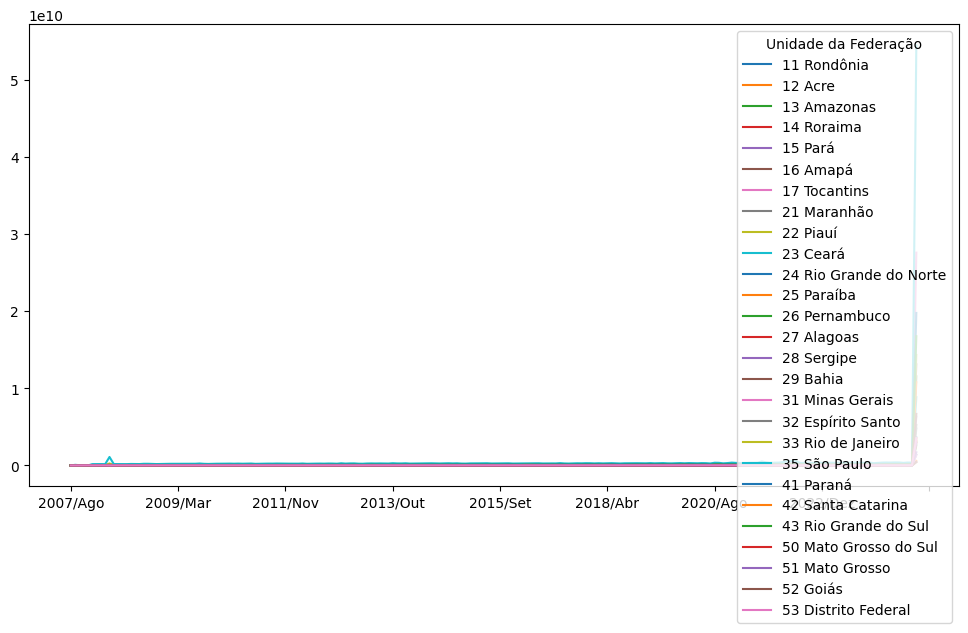

In [104]:
dados_usuaveis.T.plot(figsize=(12,6))

In [105]:
# O total está sendo apresentado no gráfico. Isso está causando distorção na visualização, pois os alores são muito altos
dados_usuaveis["Total"]

Unidade da Federação
11 Rondônia               1.394.262.146,50
12 Acre                     587.778.407,94
13 Amazonas               2.613.559.191,21
14 Roraima                  451.170.144,15
15 Pará                   6.322.687.933,44
16 Amapá                    434.057.663,03
17 Tocantins              1.364.198.743,40
21 Maranhão               5.245.996.055,35
22 Piauí                  3.055.504.906,18
23 Ceará                  8.854.791.965,38
24 Rio Grande do Norte    3.639.512.926,05
25 Paraíba                3.520.456.040,98
26 Pernambuco            11.552.242.820,69
27 Alagoas                2.917.322.193,59
28 Sergipe                1.702.812.778,16
29 Bahia                 13.106.353.081,84
31 Minas Gerais          27.581.694.491,94
32 Espírito Santo         4.784.325.123,75
33 Rio de Janeiro        14.318.869.113,09
35 São Paulo             54.440.115.497,18
41 Paraná                19.763.419.297,81
42 Santa Catarina        10.780.033.131,67
43 Rio Grande do Sul     16.750.1

In [106]:
# Excluindo a coluna Total usando o método drop
dados_usuaveis = dados_usuaveis.drop("Total", axis=1)

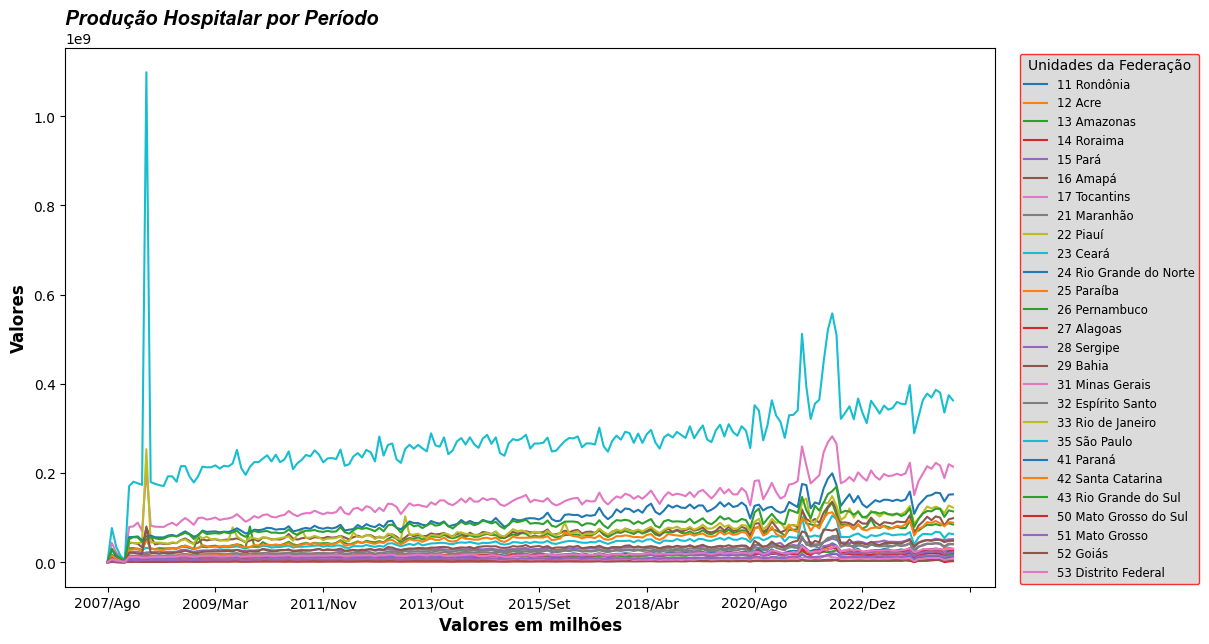

In [107]:
# Desafio: Reposicionar a legenda
# Desafio1: Colocar títulos nos dois eixos
# Desafio2: Retocar visualização da legenda

dados_usuaveis.T.plot(figsize=(12,7))

# Configura a legenda do gráfico, definindo 'Unidades da Federação' como seu título. 
# Ajusta o tamanho da fonte para 'pequeno' e posiciona a legenda fora do gráfico, no canto superior esquerdo. 
# Personaliza a caixa da legenda para ter bordas vermelhas (edgecolor) e fundo cinza claro (facecolor), mantendo a caixa visível com 'frameon=True'.
plt.legend(title="Unidades da Federação", 
           fontsize="small", 
           #fontweight="bold",
           loc="upper left", 
           bbox_to_anchor=(1.02,1), 
           frameon=True, 
           edgecolor="red", 
           facecolor="lightgray")

# Define o título do gráfico para melhor contextualização dos dados apresentados.
plt.title("Produção Hospitalar por Período", 
          fontsize="x-large",
          fontname="Arial",
          fontweight="bold",
          fontstyle="italic",
          loc="left")

plt.xlabel("Valores em milhões",
           fontsize="large",
           fontweight="bold")

plt.ylabel("Valores",
           fontsize="large",
           fontweight="bold")

# Exibe o gráfico configurado.
plt.show()

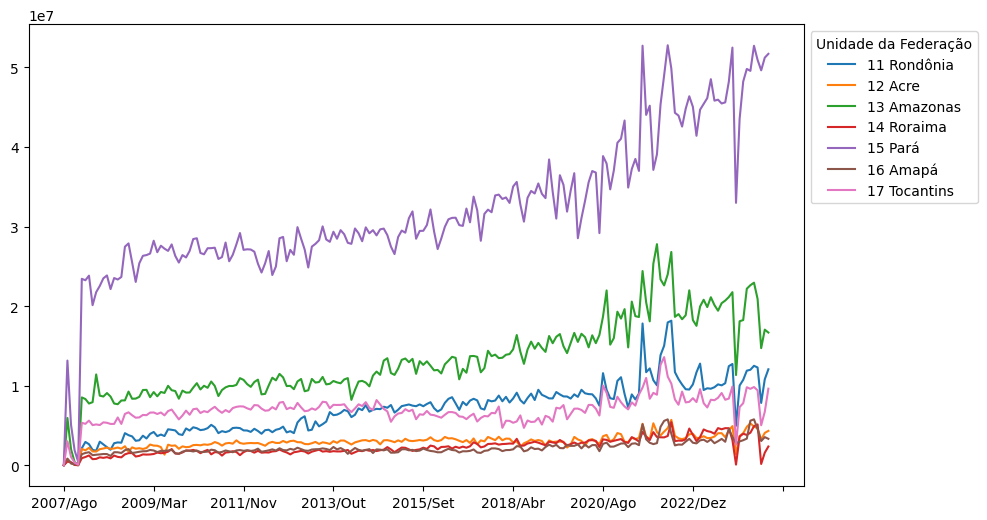

In [108]:
# Filtrar os 7 primeiros estados
dados_usuaveis[:7].T.plot(figsize=(10,6))
plt.legend(title="Unidade da Federação",
           loc="upper left",
           bbox_to_anchor=(1,1))

In [109]:
# Retorna várias amostras do dataframe, neste caso, 7 amostras.
dados_usuaveis.sample(n=7)

,2007/Ago,2007/Dez,2007/Nov,2007/Out,2007/Set,2008/Abr,2008/Ago,2008/Dez,2008/Fev,2008/Jan,...,2023/Dez,2023/Fev,2023/Jan,2023/Jul,2023/Jun,2023/Mai,2023/Mar,2023/Nov,2023/Out,2023/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
23 Ceará,"357.904,65","10.798.042,86","5.131.814,39","1.865.065,71","572.356,18","31.376.221,00","29.304.821,51","30.263.904,48","27.643.304,86","32.444.328,54",...,"39.043.483,57","55.649.999,92","63.411.467,21","63.288.492,32","62.197.447,26","68.367.984,61","66.942.075,12","54.152.759,50","64.716.508,58","63.072.515,00"
53 Distrito Federal,"191.951,47","7.121.965,42","3.813.256,48","2.165.619,56","769.966,25","11.922.015,36","11.548.451,89","12.005.669,60","10.215.956,80","10.561.085,46",...,"22.830.282,42","24.993.772,25","29.294.886,93","29.544.407,37","28.337.591,67","29.919.839,16","28.980.515,22","27.785.666,95","29.776.844,99","29.636.228,70"
13 Amazonas,"35.752,72","5.949.408,99","2.020.381,79","416.012,30","45.570,64","8.531.576,49","8.331.763,97","7.764.782,66","7.934.652,10","11.419.210,08",...,"11.345.788,28","18.106.972,90","18.254.319,87","22.193.955,78","22.636.889,89","22.951.007,22","20.916.455,27","14.725.982,12","17.051.515,93","16.686.364,04"
43 Rio Grande do Sul,"1.049.252,33","30.134.255,70","16.592.432,80","8.571.312,11","3.182.913,14","51.972.416,77","56.233.758,74","55.696.920,94","45.897.704,82","51.064.610,03",...,"79.016.335,07","97.049.526,83","108.980.244,34","114.821.469,38","114.180.633,26","119.911.799,35","119.704.904,74","101.723.680,10","116.187.553,64","114.019.622,04"
26 Pernambuco,"400.640,85","16.919.031,39","6.699.828,82","2.973.553,48","1.088.340,42","30.589.332,79","31.705.296,79","29.759.443,94","26.222.079,10","51.279.301,86",...,"70.510.590,94","70.602.974,71","77.990.124,85","84.272.170,93","83.182.723,88","85.477.212,26","82.729.361,45","84.159.542,17","87.506.414,23","84.546.480,54"
51 Mato Grosso,"63.562,50","5.394.225,43","1.740.439,60","927.219,59","232.444,62","9.390.588,03","8.987.811,95","9.210.598,63","7.929.894,93","8.213.438,64",...,"13.608.235,28","20.012.163,04","21.846.460,91","23.550.934,50","22.929.285,47","24.470.787,76","23.311.478,85","18.757.993,99","21.572.148,20","22.424.730,11"
12 Acre,"10.470,07","769.612,36","301.323,68","86.200,85","14.001,71","2.057.829,69","1.886.871,84","2.196.651,69","1.743.978,66","1.731.744,62",...,"1.394.717,40","3.681.605,49","4.031.665,20","4.830.246,24","5.282.731,30","4.861.672,52","4.660.970,89","3.233.614,21","4.071.963,23","4.329.288,81"


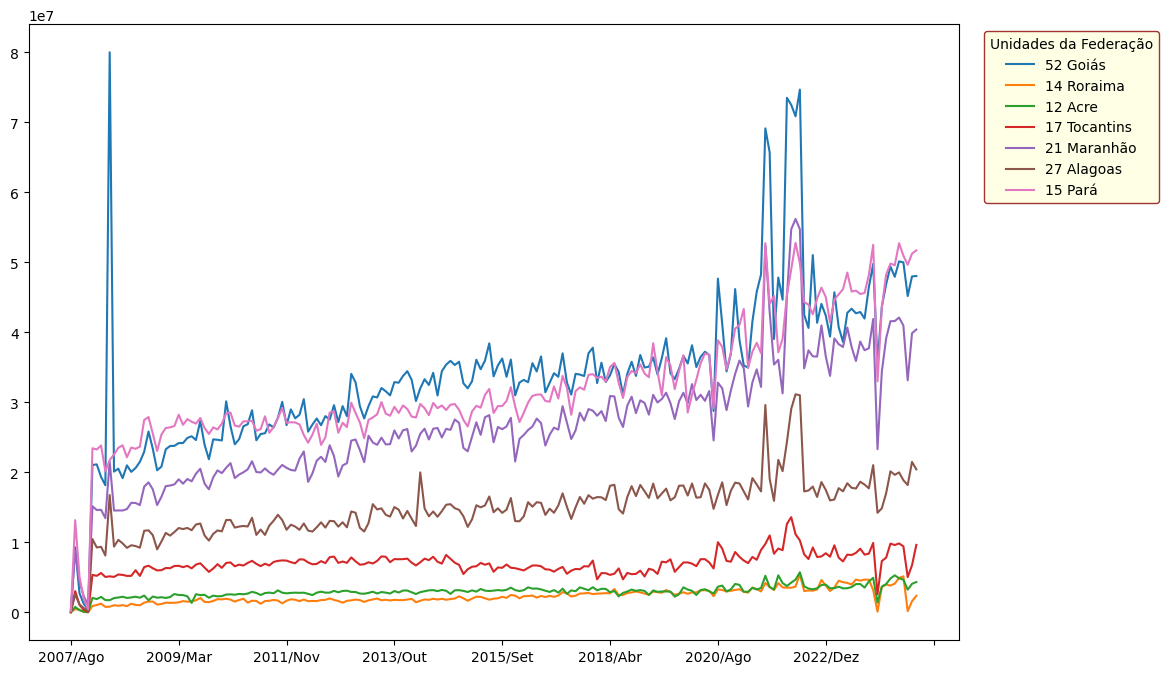

In [110]:
# Plotando um gráfico com amostras aleatórias
dados_usuaveis.sample(n=7).T.plot(figsize=(12,8))
plt.legend(title="Unidades da Federação",
           loc="upper left",
           bbox_to_anchor=(1.02,1),
           facecolor="lightyellow",
           edgecolor="darkred")

In [111]:
# Importa a biblioteca numpy com o alias 'np'
import numpy as np

# Define uma semente (seed) para o gerador de números aleatórios do numpy
# Isso garante que os resultados sejam reproduzíveis sempre que o script for executado
np.random.seed(524387)

# Seleciona uma amostra aleatória de 7 elementos do DataFrame 'dados_usuaveis'
# A seleção é feita de forma aleatória, mas a semente definida acima garante que a amostra seja sempre a mesma
dados_usuaveis.sample(n=7)

,2007/Ago,2007/Dez,2007/Nov,2007/Out,2007/Set,2008/Abr,2008/Ago,2008/Dez,2008/Fev,2008/Jan,...,2023/Dez,2023/Fev,2023/Jan,2023/Jul,2023/Jun,2023/Mai,2023/Mar,2023/Nov,2023/Out,2023/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
17 Tocantins,"4.113,76","3.022.200,87","1.068.685,94","343.702,61","76.633,06","5.343.714,73","5.213.290,38","5.614.918,90","5.051.932,07","5.136.474,61",...,"2.582.404,81","7.323.527,15","7.803.821,34","9.812.714,43","9.612.631,73","9.839.564,73","9.423.976,82","5.032.974,30","6.722.881,55","9.629.774,49"
26 Pernambuco,"400.640,85","16.919.031,39","6.699.828,82","2.973.553,48","1.088.340,42","30.589.332,79","31.705.296,79","29.759.443,94","26.222.079,10","51.279.301,86",...,"70.510.590,94","70.602.974,71","77.990.124,85","84.272.170,93","83.182.723,88","85.477.212,26","82.729.361,45","84.159.542,17","87.506.414,23","84.546.480,54"
31 Minas Gerais,"971.394,37","43.429.517,54","21.730.281,63","10.018.011,35","2.861.781,50","79.046.322,41","80.374.117,08","88.928.630,30","70.301.089,50","206.936.986,60",...,"150.535.681,66","181.714.092,68","198.083.435,98","215.203.958,92","209.415.536,12","222.826.001,02","216.708.207,72","188.894.562,58","219.842.531,75","214.385.538,67"
22 Piauí,"220.788,25","4.929.772,93","2.406.035,32","1.078.182,68","353.468,67","10.227.943,00","10.645.917,52","10.151.738,46","9.711.680,20","11.375.419,37",...,"15.246.017,28","18.867.067,54","20.919.187,60","24.148.200,85","22.652.737,92","24.290.899,80","22.635.444,51","19.415.247,34","22.878.158,31","23.745.716,86"
25 Paraíba,"97.352,78","5.448.177,36","2.149.873,40","1.002.088,64","368.130,43","12.680.965,13","12.673.774,35","12.454.203,96","10.871.589,62","16.599.004,84",...,"22.919.821,02","21.788.454,65","23.622.813,51","29.740.088,51","26.911.662,03","27.755.853,91","26.455.201,21","29.967.383,44","32.470.904,31","30.401.990,26"
29 Bahia,"135.146,36","11.948.984,56","3.348.779,62","1.382.038,11","448.349,75","42.826.993,62","43.254.543,33","41.424.654,95","33.410.124,06","76.783.410,11",...,"63.597.562,30","81.976.078,59","90.758.946,13","102.100.395,68","94.297.040,65","102.912.686,46","100.041.097,28","82.159.987,14","96.323.451,91","98.629.226,08"
42 Santa Catarina,"693.955,05","14.772.555,10","7.578.502,38","3.562.300,82","1.092.964,12","27.806.641,44","28.887.854,62","30.454.606,34","24.409.572,92","53.034.384,67",...,"59.848.379,26","74.591.597,69","79.505.741,96","89.820.345,01","88.270.148,66","92.358.687,52","87.375.896,09","80.434.789,80","89.924.700,23","88.811.503,07"


<Axes: >

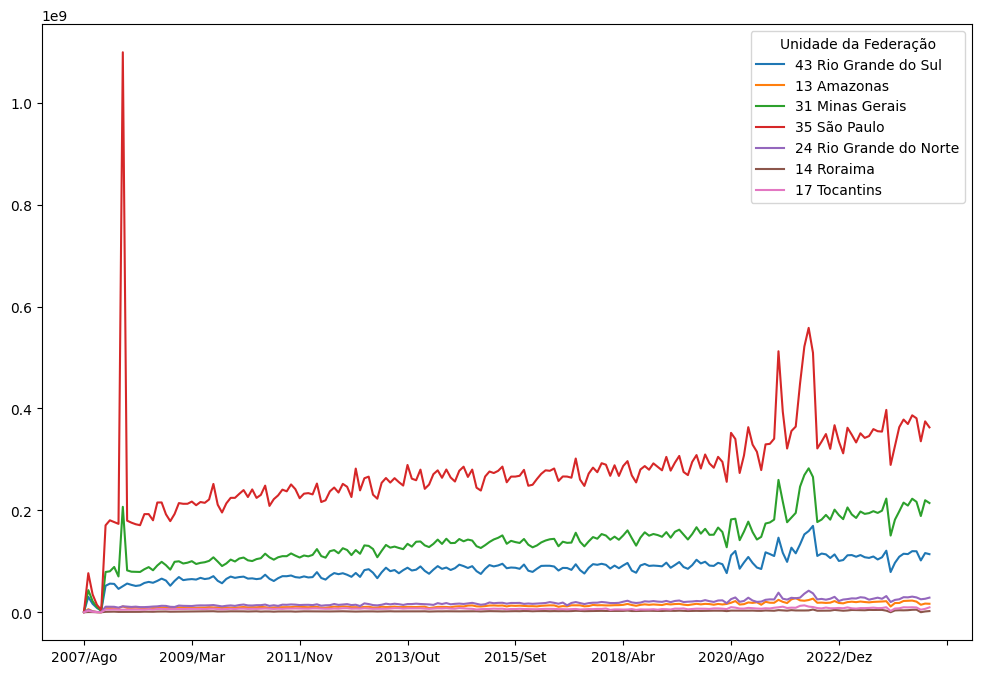

In [112]:
# O resultado das amostras plotadas no gráfico são diferentes da anterior
# Todavia, serão sempre os mesmos se executados na sequencia
dados_usuaveis.sample(n=7).T.plot(figsize=(12,8))

In [113]:
# Adiciona uma nova coluna chamada 'Total' ao DataFrame 'dados_usuaveis'
# Essa coluna é o resultado da soma dos valores em cada linha (axis=1 indica que a operação é realizada linha a linha)
dados_usuaveis["Total"] = dados_usuaveis.sum(axis=1)

# Exibe as primeiras 5 linhas do DataFrame 'dados_usuaveis' para visualização
# Isso é útil para verificar rapidamente os dados após a adição da nova coluna 'Total'
dados_usuaveis.head()

,2007/Ago,2007/Dez,2007/Nov,2007/Out,2007/Set,2008/Abr,2008/Ago,2008/Dez,2008/Fev,2008/Jan,...,2023/Fev,2023/Jan,2023/Jul,2023/Jun,2023/Mai,2023/Mar,2023/Nov,2023/Out,2023/Set,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,"4.209,37","711.758,31","346.912,84","133.645,19","16.397,03","2.143.353,81","2.938.286,29","2.651.804,89","1.940.792,63","1.829.559,71",...,"10.030.205,85","10.740.989,45","11.892.438,13","12.009.682,89","12.505.974,83","12.294.890,40","7.839.878,93","10.814.659,45","12.068.445,93","1.391.827.424,30"
12 Acre,"10.470,07","769.612,36","301.323,68","86.200,85","14.001,71","2.057.829,69","1.886.871,84","2.196.651,69","1.743.978,66","1.731.744,62",...,"3.681.605,49","4.031.665,20","4.830.246,24","5.282.731,30","4.861.672,52","4.660.970,89","3.233.614,21","4.071.963,23","4.329.288,81","587.777.124,12"
13 Amazonas,"35.752,72","5.949.408,99","2.020.381,79","416.012,30","45.570,64","8.531.576,49","8.331.763,97","7.764.782,66","7.934.652,10","11.419.210,08",...,"18.106.972,90","18.254.319,87","22.193.955,78","22.636.889,89","22.951.007,22","20.916.455,27","14.725.982,12","17.051.515,93","16.686.364,04","2.608.718.161,49"
14 Roraima,"4.785,91","470.676,43","369.328,51","43.852,67","11.858,63","896.952,53","1.045.291,11","1.236.529,18","771.687,83","808.448,39",...,"3.600.034,74","3.975.249,60","3.814.616,24","4.097.022,28","4.915.988,80","5.138.823,17","165.184,76","1.585.002,57","2.362.582,36","451.127.785,41"
15 Pará,"181.159,29","13.162.823,43","5.105.406,44","1.893.197,50","433.414,74","23.436.682,75","23.259.148,28","23.836.162,40","20.126.081,01","21.762.104,16",...,"43.531.526,93","48.239.104,57","49.819.035,62","49.576.192,93","52.730.367,64","50.953.053,21","49.646.581,93","51.237.171,71","51.714.821,84","6.309.059.011,86"


In [114]:
# Desafio: Ordenar o DataFrame pela coluna Total exibindo primeiro o maior gasto
# Desafio: Adicionar uma coluna com a região de cada estado
# Desafio: Adicionar seu estado nessa lista de 7 estados

In [155]:
# Desafio: Ordenar o DataFrame pela coluna Total exibindo primeiro o maior gasto

# Ordena o DataFrame 'dados_usuaveis' com base nos valores da coluna 'Total', em ordem decrescente
# O argumento 'ascending=0' especifica que a ordenação deve ser feita de forma decrescente
dados_usuaveis.sort_values(by="Total", ascending=False, inplace=True)
dados_usuaveis

,2007/Ago,2007/Dez,2007/Nov,2007/Out,2007/Set,2008/Abr,2008/Ago,2008/Dez,2008/Fev,2008/Jan,...,2023/Fev,2023/Jan,2023/Jul,2023/Jun,2023/Mai,2023/Mar,2023/Nov,2023/Out,2023/Set,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,"1.665.349,90","76.668.547,41","35.032.259,98","14.577.395,84","4.434.168,64","170.591.864,96","180.503.448,72","177.095.026,47","173.518.271,93","1.098.866.284,75",...,"326.048.675,55","363.252.960,58","378.210.221,65","369.420.874,89","386.515.192,31","380.675.682,67","335.486.802,01","374.629.976,37","362.854.888,92","54.243.940.478,25"
31 Minas Gerais,"971.394,37","43.429.517,54","21.730.281,63","10.018.011,35","2.861.781,50","79.046.322,41","80.374.117,08","88.928.630,30","70.301.089,50","206.936.986,60",...,"181.714.092,68","198.083.435,98","215.203.958,92","209.415.536,12","222.826.001,02","216.708.207,72","188.894.562,58","219.842.531,75","214.385.538,67","27.501.084.385,19"
41 Paraná,"554.800,22","28.790.722,87","11.120.030,79","4.630.402,44","1.431.708,01","56.115.135,82","56.699.001,13","57.816.197,74","48.855.046,46","58.081.334,45",...,"128.145.057,55","138.286.786,26","148.652.511,49","150.601.146,87","155.962.309,38","154.908.096,89","136.377.606,71","151.522.479,20","152.226.546,07","19.700.887.225,42"
43 Rio Grande do Sul,"1.049.252,33","30.134.255,70","16.592.432,80","8.571.312,11","3.182.913,14","51.972.416,77","56.233.758,74","55.696.920,94","45.897.704,82","51.064.610,03",...,"97.049.526,83","108.980.244,34","114.821.469,38","114.180.633,26","119.911.799,35","119.704.904,74","101.723.680,10","116.187.553,64","114.019.622,04","16.714.933.327,60"
33 Rio de Janeiro,"469.469,34","13.627.123,27","7.250.528,08","2.994.664,57","921.646,57","45.324.789,60","42.502.172,22","43.045.899,95","44.128.159,73","253.437.962,44",...,"98.052.106,86","111.141.604,26","124.936.573,24","120.430.350,51","124.710.154,00","120.765.143,15","110.293.990,40","127.245.165,17","122.532.382,59","14.277.033.723,47"
29 Bahia,"135.146,36","11.948.984,56","3.348.779,62","1.382.038,11","448.349,75","42.826.993,62","43.254.543,33","41.424.654,95","33.410.124,06","76.783.410,11",...,"81.976.078,59","90.758.946,13","102.100.395,68","94.297.040,65","102.912.686,46","100.041.097,28","82.159.987,14","96.323.451,91","98.629.226,08","13.070.669.826,41"
26 Pernambuco,"400.640,85","16.919.031,39","6.699.828,82","2.973.553,48","1.088.340,42","30.589.332,79","31.705.296,79","29.759.443,94","26.222.079,10","51.279.301,86",...,"70.602.974,71","77.990.124,85","84.272.170,93","83.182.723,88","85.477.212,26","82.729.361,45","84.159.542,17","87.506.414,23","84.546.480,54","11.510.246.224,24"
42 Santa Catarina,"693.955,05","14.772.555,10","7.578.502,38","3.562.300,82","1.092.964,12","27.806.641,44","28.887.854,62","30.454.606,34","24.409.572,92","53.034.384,67",...,"74.591.597,69","79.505.741,96","89.820.345,01","88.270.148,66","92.358.687,52","87.375.896,09","80.434.789,80","89.924.700,23","88.811.503,07","10.742.748.656,66"
23 Ceará,"357.904,65","10.798.042,86","5.131.814,39","1.865.065,71","572.356,18","31.376.221,00","29.304.821,51","30.263.904,48","27.643.304,86","32.444.328,54",...,"55.649.999,92","63.411.467,21","63.288.492,32","62.197.447,26","68.367.984,61","66.942.075,12","54.152.759,50","64.716.508,58","63.072.515,00","8.833.520.782,89"


In [156]:
# Desafio: Adicionar seu estado nessa lista de 7 estados

# Define uma semente (seed) para o gerador de números aleatórios do numpy
# Isso garante que os resultados sejam reproduzíveis sempre que o script for executado
np.random.seed(524387)

# Seleciona uma amostra aleatória de 7 elementos do DataFrame 'dados_usuaveis'
# A seleção é feita de forma aleatória, mas a semente definida acima garante que a amostra seja sempre a mesma
dados_7_estados = dados_usuaveis.sample(n=7)

# Inserir os dados do estado do Paraná
dados_7_estados.loc["41 Paraná"] = dados_usuaveis.loc["41 Paraná"]

# Excluindo a coluna Total usando o método drop
# dados_7_estados = dados_7_estados.drop("Total", axis=1)
dados_7_estados.drop("Total", axis=1, inplace=True) # Usando o argumento inplace=True, não é necessário fazer a reatribuição (sobrescrever)

dados_7_estados


,2007/Ago,2007/Dez,2007/Nov,2007/Out,2007/Set,2008/Abr,2008/Ago,2008/Dez,2008/Fev,2008/Jan,...,2023/Dez,2023/Fev,2023/Jan,2023/Jul,2023/Jun,2023/Mai,2023/Mar,2023/Nov,2023/Out,2023/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
26 Pernambuco,"400.640,85","16.919.031,39","6.699.828,82","2.973.553,48","1.088.340,42","30.589.332,79","31.705.296,79","29.759.443,94","26.222.079,10","51.279.301,86",...,"70.510.590,94","70.602.974,71","77.990.124,85","84.272.170,93","83.182.723,88","85.477.212,26","82.729.361,45","84.159.542,17","87.506.414,23","84.546.480,54"
32 Espírito Santo,"57.408,11","5.724.199,54","2.296.383,23","1.152.115,25","284.224,80","12.453.466,98","12.384.068,19","12.531.576,01","10.032.886,43","16.212.109,41",...,"27.677.906,02","34.916.435,49","37.391.018,24","41.223.811,54","40.733.853,91","43.179.230,48","41.981.809,80","35.767.904,73","41.809.848,79","40.478.673,23"
50 Mato Grosso do Sul,"199.556,12","4.277.979,14","1.995.899,52","1.069.816,66","573.675,41","8.997.542,75","9.602.843,49","9.140.959,80","8.279.288,79","8.301.006,10",...,"11.104.710,76","22.730.863,13","24.817.932,00","27.408.836,70","25.980.327,81","27.012.124,81","27.070.737,55","17.975.196,66","24.356.440,44","25.897.790,89"
23 Ceará,"357.904,65","10.798.042,86","5.131.814,39","1.865.065,71","572.356,18","31.376.221,00","29.304.821,51","30.263.904,48","27.643.304,86","32.444.328,54",...,"39.043.483,57","55.649.999,92","63.411.467,21","63.288.492,32","62.197.447,26","68.367.984,61","66.942.075,12","54.152.759,50","64.716.508,58","63.072.515,00"
21 Maranhão,"385.330,18","8.832.514,85","4.334.468,23","2.277.717,78","1.018.352,93","15.148.647,11","14.609.872,57","14.644.528,47","13.452.263,93","21.551.600,33",...,"23.303.880,58","34.365.965,84","39.134.327,28","41.589.508,81","41.608.384,22","42.107.180,54","40.977.333,48","33.146.563,03","39.865.036,47","40.399.651,12"
25 Paraíba,"97.352,78","5.448.177,36","2.149.873,40","1.002.088,64","368.130,43","12.680.965,13","12.673.774,35","12.454.203,96","10.871.589,62","16.599.004,84",...,"22.919.821,02","21.788.454,65","23.622.813,51","29.740.088,51","26.911.662,03","27.755.853,91","26.455.201,21","29.967.383,44","32.470.904,31","30.401.990,26"
28 Sergipe,"27.453,63","2.765.495,63","775.705,52","122.952,94","78.565,19","5.265.951,03","4.543.252,50","4.272.627,88","4.636.850,76","5.439.985,99",...,"7.384.410,87","13.138.132,69","14.367.795,78","15.737.481,70","14.519.643,00","15.423.708,12","15.105.725,57","9.969.199,68","14.134.633,75","15.529.143,60"
41 Paraná,"554.800,22","28.790.722,87","11.120.030,79","4.630.402,44","1.431.708,01","56.115.135,82","56.699.001,13","57.816.197,74","48.855.046,46","58.081.334,45",...,"108.392.132,04","128.145.057,55","138.286.786,26","148.652.511,49","150.601.146,87","155.962.309,38","154.908.096,89","136.377.606,71","151.522.479,20","152.226.546,07"


Text(0, 0.5, 'Valores')

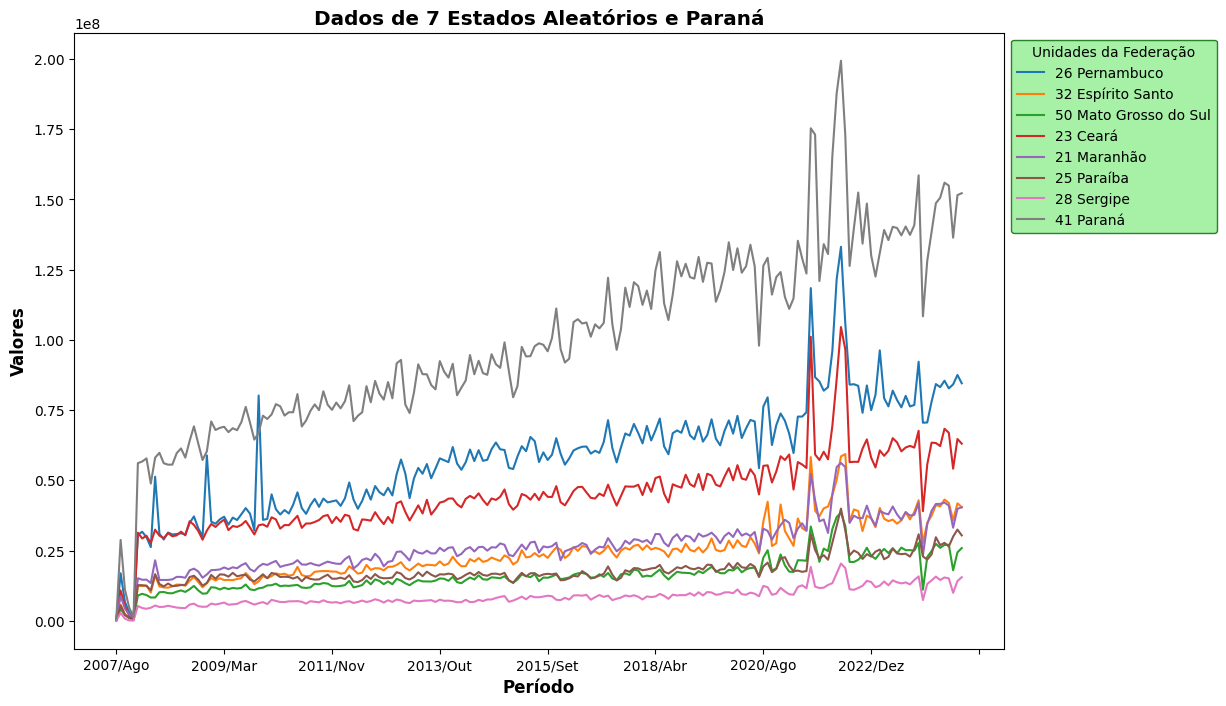

In [157]:
dados_7_estados.T.plot(figsize=(12,8), kind="line")
plt.legend(title="Unidades da Federação",
           loc="upper left",
           bbox_to_anchor=(1,1),
           facecolor="lightgreen",
           edgecolor="darkgreen")

plt.title("Dados de 7 Estados Aleatórios e Paraná",
          fontsize="x-large",
          fontweight="bold")

plt.xlabel("Período",
           fontsize="large",
           fontweight="bold")

plt.ylabel("Valores",
           fontsize="large",
           fontweight="bold")

2008/Jan
2009/Jan
2010/Jan
2011/Jan
2012/Jan
2013/Jan
2014/Jan
2015/Jan
2016/Jan
2017/Jan
2018/Jan
2019/Jan
2020/Jan
2021/Jan
2022/Jan
2023/Jan


Text(0.5, 0, 'Período anual')

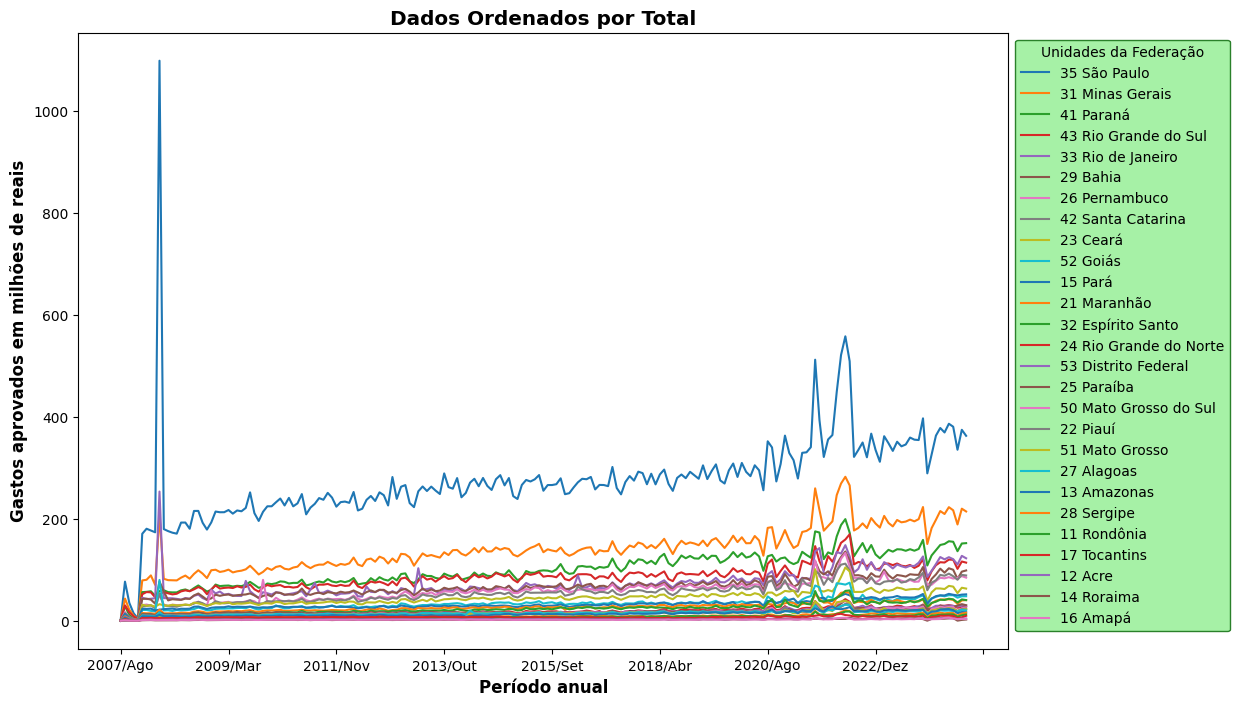

In [165]:
dados_ordenados = dados_usuaveis / 1_000_000
dados_ordenados.drop("Total", axis=1, inplace=True)

axis = dados_ordenados.T.plot(figsize=(12,8))

axis.legend(title="Unidades da Federação",
           loc="upper left",
           bbox_to_anchor=(1,1),
           facecolor="lightgreen",
           edgecolor="darkgreen")

axis.set_title("Dados Ordenados por Total",
          fontsize="x-large",
          fontweight="bold")

axis.set_ylabel("Gastos aprovados em milhões de reais",
           fontsize="large",
           fontweight="bold")

axis.set_xlabel("Período anual",
           fontsize="large",
           fontweight="bold")

In [211]:
# 
def plota_gastos_por_mes(dados, figsize=(12,8)):
    axis = dados.T.plot(figsize=figsize)

    axis.legend(title="Unidades da Federação",
            loc="upper left",
            bbox_to_anchor=(1,1),
            facecolor="lightgreen",
            edgecolor="darkgreen")

    axis.set_title("Dados Ordenados por Total",
            fontsize="x-large",
            fontweight="bold")

    axis.set_ylabel("Gastos aprovados em milhões de reais",
            fontsize="large",
            fontweight="bold")

    axis.set_xlabel("Período anual",
            fontsize="large",
            fontweight="bold")
    

(0.0, 640.0)

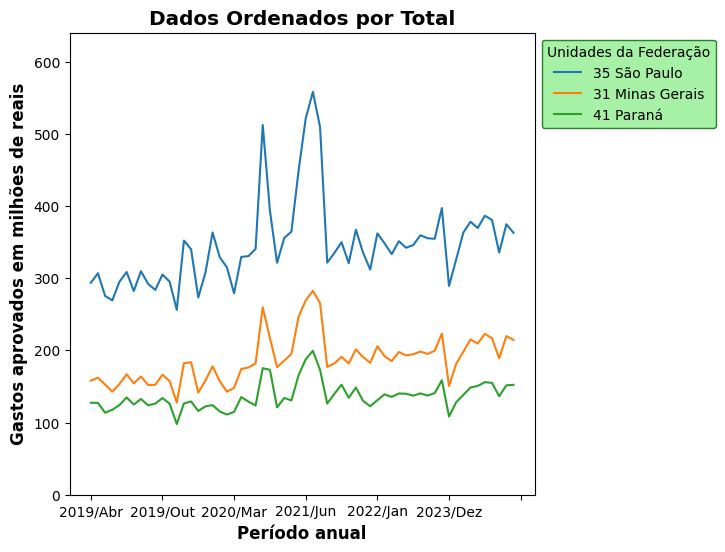

In [212]:
plota_gastos_por_mes(dados_ordenados[dados_ordenados.columns[-60:]].head(3), (6,6))

# Setar o limite
plt.ylim(0,640)

(0.0, 640.0)

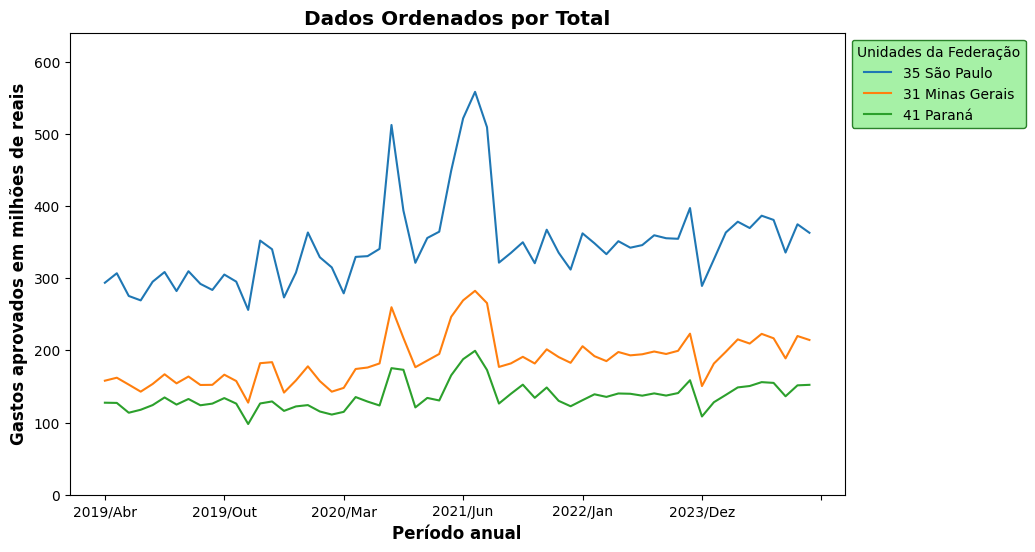

In [213]:
plota_gastos_por_mes(dados_ordenados[dados_ordenados.columns[-60:]].head(3), (10,6))

# Setar o limite
plt.ylim(0,640)

(0.0, 640.0)

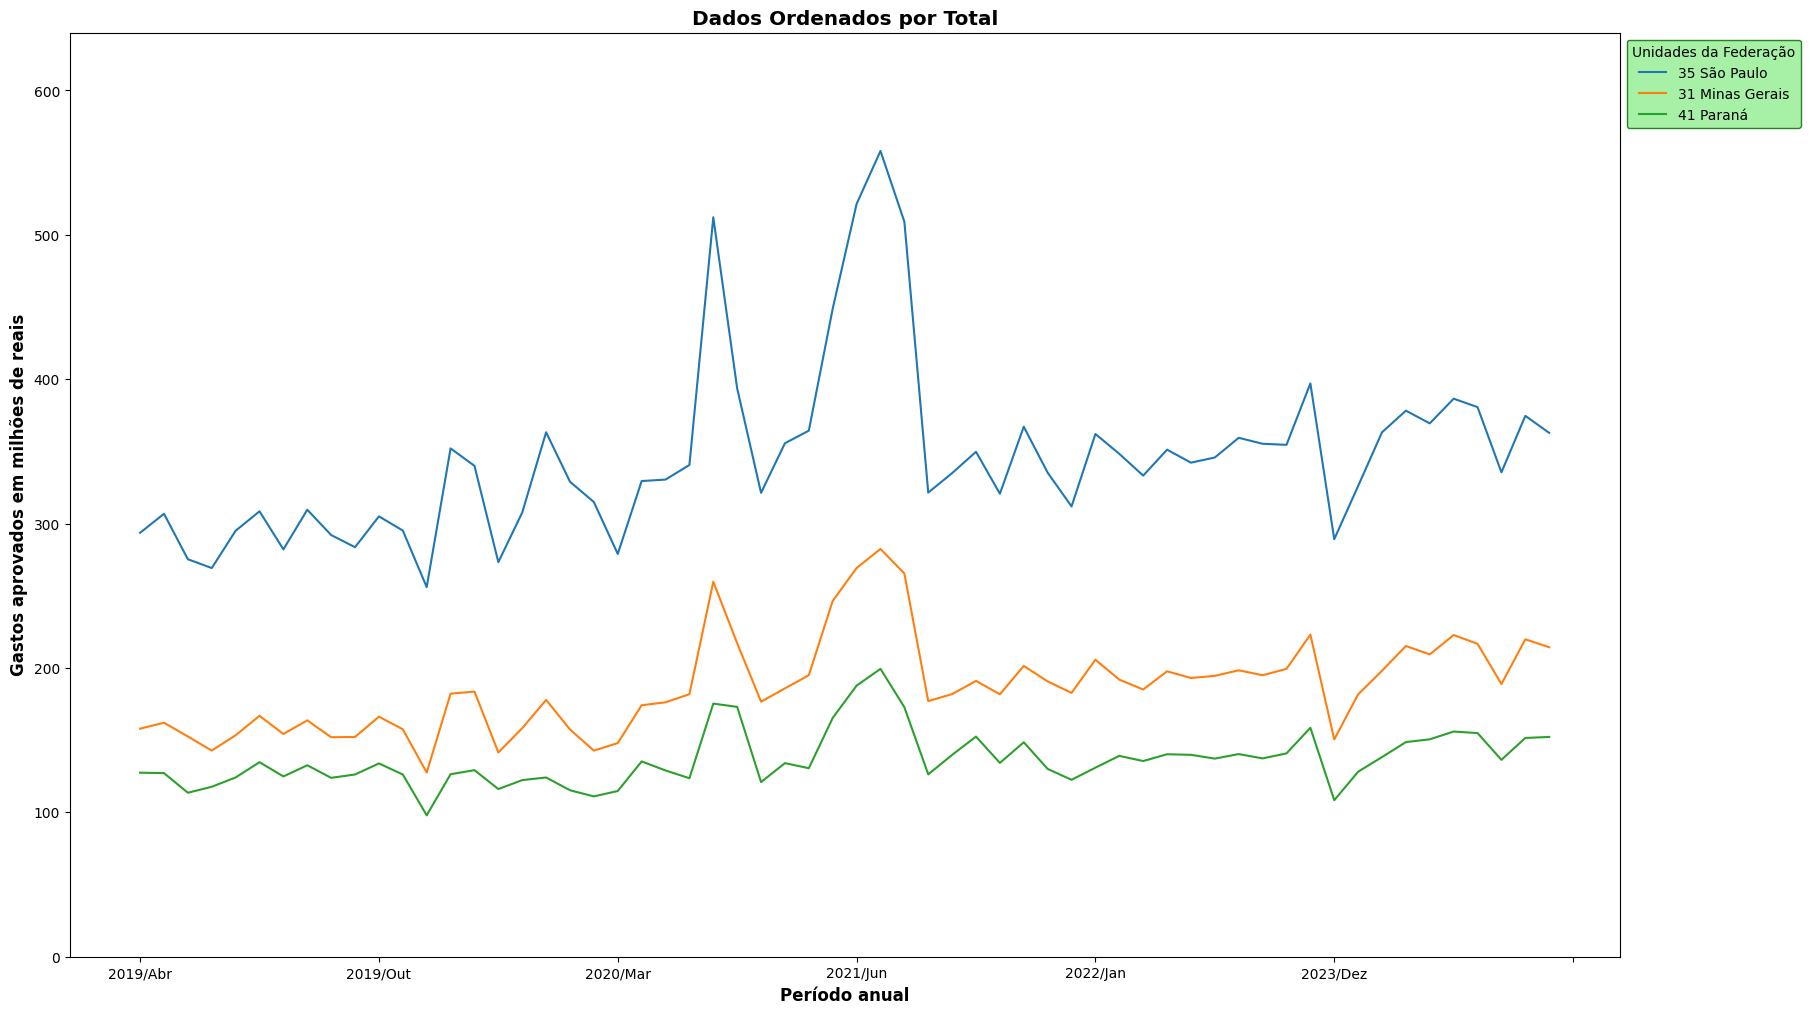

In [214]:
plota_gastos_por_mes(dados_ordenados[dados_ordenados.columns[-60:]].head(3), (20,12))

# Setar o limite
plt.ylim(0,640)

In [215]:
# Desafio: Padronizar os ticks verticais para espaçamento de 12 em 12 unidades (uma vez ao ano)
# Desafio: Escolher e utilizar outras cores para saltar mais ao olhos
# Desafio: Colocar uma grade (grid) vertical e horizontal que não seja intrusivo

In [232]:
mes = "Jan"
colunas_anuais = []
for anual in colunas_usaveis:
    if mes in anual:
        colunas_anuais.append(anual)

dados_ordenados[colunas_anuais].head(3)

,2008/Jan,2009/Jan,2010/Jan,2011/Jan,2012/Jan,2013/Jan,2014/Jan,2015/Jan,2016/Jan,2017/Jan,2018/Jan,2019/Jan,2020/Jan,2021/Jan,2022/Jan,2023/Jan
Unidade da Federação,,,,,,,,,,,,,,,,
35 São Paulo,"1.098,87","192,85","213,72","229,37","237,20","253,97","270,96","266,40","261,48","272,08","280,18","295,07","307,67","364,37","362,07","363,25"
31 Minas Gerais,"206,94","99,02","95,81","107,92","119,86","120,47","134,16","131,70","131,13","139,07","146,54","153,41","158,32","194,99","205,71","198,08"
41 Paraná,"58,08","60,38","66,90","74,71","74,22","81,23","85,54","83,54","93,32","103,86","116,13","124,16","122,33","130,57","130,96","138,29"


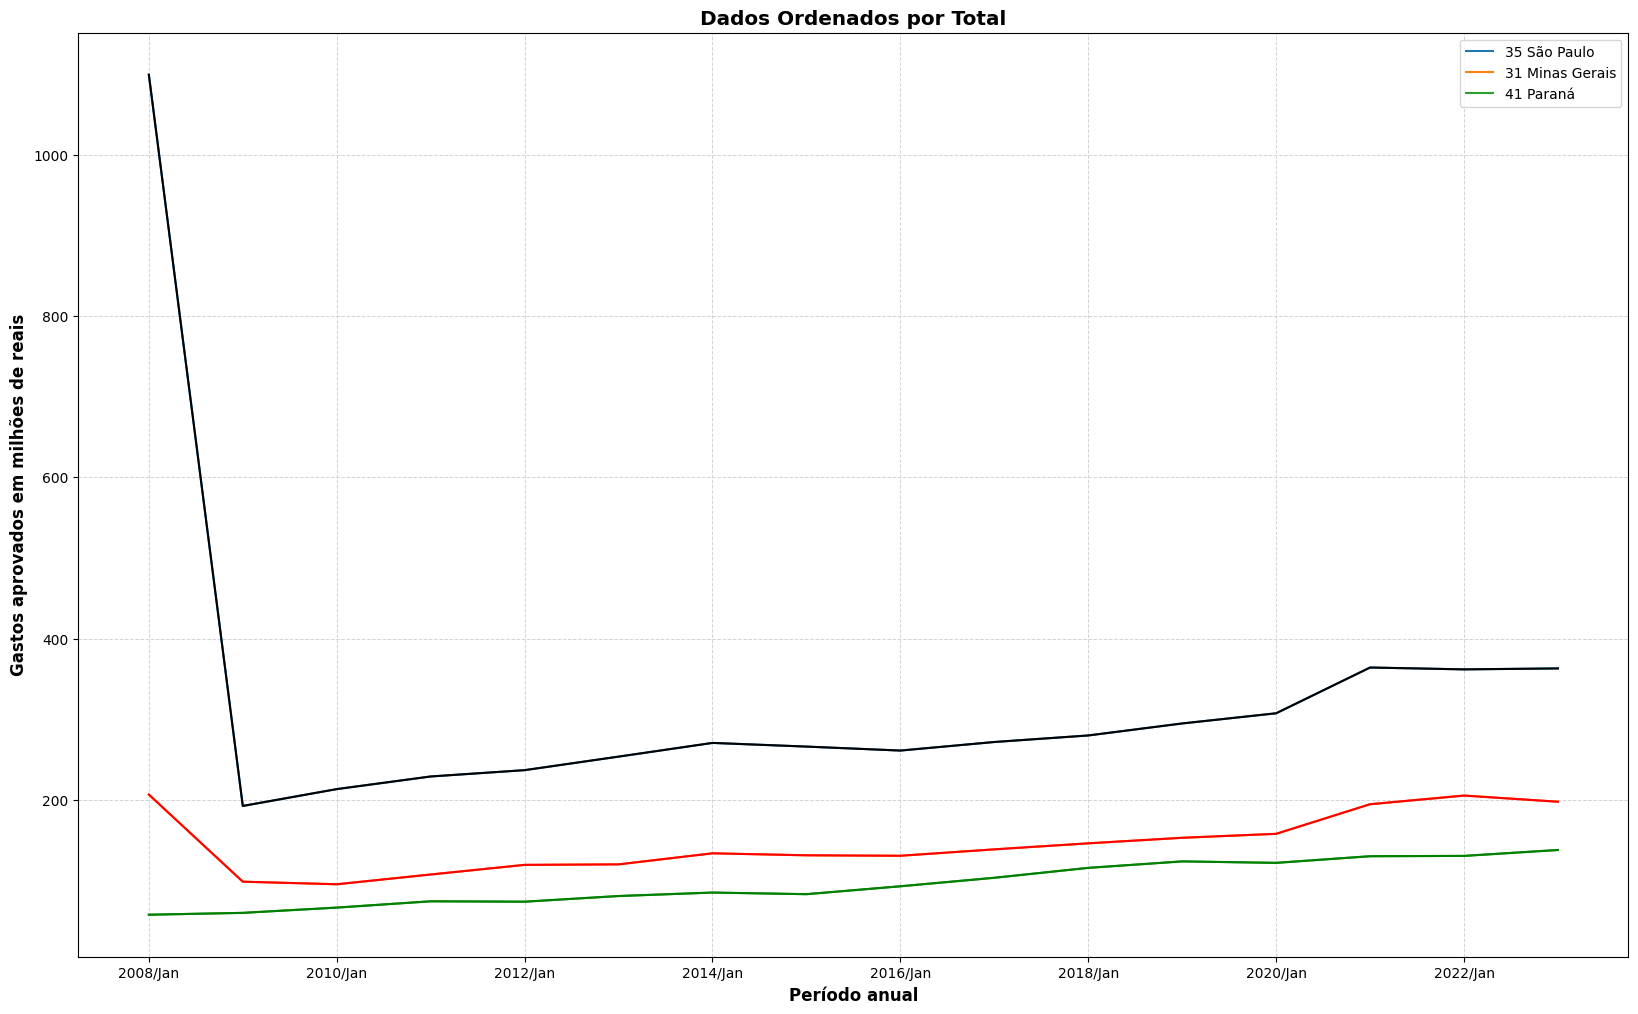

In [270]:
plota_gastos_por_mes(dados_ordenados[colunas_anuais].head(3), (20,12))

plt.grid(True, color="lightgray", linestyle="--", linewidth=0.7)

plt.plot(colunas_anuais, dados_ordenados[colunas_anuais].loc["35 São Paulo"], color="black")

plt.plot(colunas_anuais, dados_ordenados[colunas_anuais].loc["31 Minas Gerais"], color="red")

plt.plot(colunas_anuais, dados_ordenados[colunas_anuais].loc["41 Paraná"], color="green")


# Setar o limite
#plt.ylim(0,640)


In [265]:

#Dados de Minas
dados_ordenados.loc["31 Minas Gerais"]

#Anos
#colunas_anuais

2007/Ago     0,97
2007/Dez    43,43
2007/Nov    21,73
2007/Out    10,02
2007/Set     2,86
            ...  
2023/Mai   222,83
2023/Mar   216,71
2023/Nov   188,89
2023/Out   219,84
2023/Set   214,39
Name: 31 Minas Gerais, Length: 197, dtype: float64